# Figure for alternative vulnerabitity definition $vul_{Fatalities+1}$

In [6]:
from matplotlib import pyplot as plt
import matplotlib.ticker
import statistics
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import pymannkendall as mk
import pandas as pd
import numpy as np
import shapely.wkt
import statsmodels.api as sm
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyts.decomposition import SingularSpectrumAnalysis
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load data
natcat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_NatCat_fatalities_damages_filled.csv')
emdat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_fatalities_damages_filled.csv')
idmc_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_displacements_filled.csv')
world=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/world_filled.csv')

In [8]:
# insert timestamp for plotting
natcat_matched['day_plot']=(natcat_matched['days']/365)+2000
emdat_matched['day_plot']=(emdat_matched['days']/365)+2000
idmc_matched['day_plot']=(idmc_matched['days']/365)+2000

In [9]:
natcat_matched['vul_fat_alt']=(natcat_matched['Fatalities']+1)/natcat_matched['affected_sum_GPW']
natcat_matched['vul_fat_alt']=natcat_matched['vul_fat_alt'].replace([-np.inf,np.inf],[np.nan,np.nan])
natcat_matched['log_vul_fat_alt']=np.log10(natcat_matched['vul_fat_alt']).replace([-np.inf,np.inf],[np.nan,np.nan])

In [10]:
emdat_matched.iloc[:,:30]

Unnamed: 0 ISO3    year           disasterno  total_deaths  no_injured  \
0             0  NPL  2005.0            2005-0556          51.0         NaN   
1             1  BGR  2002.0            2002-0552           1.0         NaN   
2             2  LAO  2002.0            2002-0614           2.0         NaN   
3             3  ECU  2013.0            2013-0372           NaN         NaN   
4             4  MEX  2007.0            2007-0435           NaN         NaN   
..          ...  ...     ...                  ...           ...         ...   
692         692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693         693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694         694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695         695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696         696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  ...  affected_sum_GPW  affected_mean_GPW  \
0                        NaN  ...            4647.0               64.0   
1                     1000.0  ...            5647.0               12.0   
2                        NaN  ...          115748.0               51.0   
3                        NaN  ...               2.0                0.0   
4                        NaN  ...          173193.0               20.0   
..                       ...  ...               ...                ...   
692                  27100.0  ...         2432082.0              578.0   
693                4448000.0  ...            9727.0               48.5   
694                      0.0  ...            2591.0               10.0   
695                 109000.0  ...             968.0                2.0   
696                 588000.0  ...            7522.0                0.0   

    DFO_satellite_shape_pop_density_GPW  GDP_affected_sum  cable_affected_sum  \
0                               587.820      2.358477e+08             0.00000   
1                                71.720      1.106601e+09             0.00000   
2                               160.740      3.040416e+09             0.00000   
3                                 2.930      2.591330e+06             0.00000   
4                                69.460      2.540924e+10             0.00000   
..                                  ...               ...                 ...   
692                            1932.395      1.388496e+11             0.22346   
693                            1200.010      7.240606e+09            47.83598   
694                              99.905      2.063824e+09             0.00000   
695                              39.195      1.466831e+09             0.00000   
696                               0.400      2.491954e+09             0.00000   

     plant_affected_sum  power_pole_affected_sum  power_tower_affected_sum  \
0               0.00000                      0.0                      49.0   
1               0.03746                    365.0                    1110.0   
2               0.00864                      0.0                    1949.0   
3               0.00000                      0.0                       0.0   
4               3.98630                      1.0                    2199.0   
..   

In [11]:
emdat_matched.loc[emdat_matched['total_deaths'].isna()]=0

In [12]:
emdat_matched.iloc[:,:30]

Unnamed: 0 ISO3    year           disasterno  total_deaths  no_injured  \
0             0  NPL  2005.0            2005-0556          51.0         NaN   
1             1  BGR  2002.0            2002-0552           1.0         NaN   
2             2  LAO  2002.0            2002-0614           2.0         NaN   
3             0    0     0.0                    0           0.0         0.0   
4             0    0     0.0                    0           0.0         0.0   
..          ...  ...     ...                  ...           ...         ...   
692         692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693         693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694         694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695           0    0     0.0                    0           0.0         0.0   
696         696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3                  0.0         0.0                   0.0   
4                  0.0         0.0                   0.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  ...  affected_sum_GPW  affected_mean_GPW  \
0                        NaN  ...            4647.0               64.0   
1                     1000.0  ...            5647.0               12.0   
2                        NaN  ...          115748.0               51.0   
3                        0.0  ...               0.0                0.0   
4                        0.0  ...               0.0                0.0   
..                       ...  ...               ...                ...   
692                  27100.0  ...         2432082.0              578.0   
693                4448000.0  ...            9727.0               48.5   
694                      0.0  ...            2591.0               10.0   
695                      0.0  ...               0.0                0.0   
696                 588000.0  ...            7522.0                0.0   

    DFO_satellite_shape_pop_density_GPW  GDP_affected_sum  cable_affected_sum  \
0                               587.820      2.358477e+08             0.00000   
1                                71.720      1.106601e+09             0.00000   
2                               160.740      3.040416e+09             0.00000   
3                                 0.000      0.000000e+00             0.00000   
4                                 0.000      0.000000e+00             0.00000   
..                                  ...               ...                 ...   
692                            1932.395      1.388496e+11             0.22346   
693                            1200.010      7.240606e+09            47.83598   
694                              99.905      2.063824e+09             0.00000   
695                               0.000      0.000000e+00             0.00000   
696                               0.400      2.491954e+09             0.00000   

     plant_affected_sum  power_pole_affected_sum  power_tower_affected_sum  \
0               0.00000                      0.0                      49.0   
1               0.03746                    365.0                    1110.0   
2               0.00864                      0.0                    1949.0   
3               0.00000                      0.0                       0.0   
4               0.00000                      0.0                       0.0   
..   

In [13]:
emdat_matched['vul_fat_alt']=(emdat_matched['total_deaths']+1)/emdat_matched['affected_sum_GPW']
emdat_matched['vul_fat_alt']=emdat_matched['vul_fat_alt'].replace([-np.inf,np.inf],[np.nan,np.nan])
emdat_matched['log_vul_fat_alt']=np.log10(emdat_matched['vul_fat_alt']).replace([-np.inf,np.inf],[np.nan,np.nan])
emdat_matched

Unnamed: 0 ISO3    year           disasterno  total_deaths  no_injured  \
0             0  NPL  2005.0            2005-0556          51.0         NaN   
1             1  BGR  2002.0            2002-0552           1.0         NaN   
2             2  LAO  2002.0            2002-0614           2.0         NaN   
3             0    0     0.0                    0           0.0         0.0   
4             0    0     0.0                    0           0.0         0.0   
..          ...  ...     ...                  ...           ...         ...   
692         692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693         693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694         694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695           0    0     0.0                    0           0.0         0.0   
696         696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3                  0.0         0.0                   0.0   
4                  0.0         0.0                   0.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  ...                     region  development  \
0                        NaN  ...                 South Asia          low   
1                     1000.0  ...      Europe & Central Asia         high   
2                        NaN  ...        East Asia & Pacific          low   
3                        0.0  ...                          0            0   
4                        0.0  ...                          0            0   
..                       ...  ...                        ...          ...   
692                  27100.0  ...        East Asia & Pacific       medium   
693                4448000.0  ...      Europe & Central Asia    very high   
694                      0.0  ...  Latin America & Caribbean         high   
695                      0.0  ...                          0            0   
696                 588000.0  ...        East Asia & Pacific    very high   

    vul_asset  log_vul_asset   vul_fat  log_vul_fat  modeled_fld_exp  \
0         NaN            NaN  0.010975    -1.959602             29.4   
1    0.001037      -2.984373  0.000177    -3.751818             17.2   
2         NaN            NaN  0.000017    -4.762483             39.7   
3    0.000000       0.000000  0.000000     0.000000              0.0   
4    0.000000       0.000000  0.000000     0.000000              0.0   
..        ...            ...       ...          ...              ...   
692  0.000059      -4.227330  0.000040    -4.394752             27.0   
693  0.219748      -0.658074  0.000720    -3.142881             11.0   
694  0.000000            NaN  0.005017    -2.299524             11.7   
695  0.000000       0.000000  0.000000     0.000000              0.0   
696  0.066305      -1.178456  0.000532    -3.274273              7.9   

        day_plot  vul_fat_alt  log_vul_fat_alt  
0    2005.734247     0.011190        -1.951169  
1    2002.608219     0.000354        -3.450788  
2    2002.583562     0.000026        -4.586392  
3       0.000000          NaN              NaN  
4       0.000000          NaN              NaN  
..           ...          ...              ...  
692  2006.073973     0.000041        -4.390343  
693  2007.484932     0.000822        -3.084889  
694  2008.035616     0.005403        -2.267339  
695     0.000000          NaN              NaN  
696  2

In [14]:
cmap = plt.cm.get_cmap('Dark2')

high = cmap(0.1)
highmi = cmap(0.4)
lowmi = cmap(0.7)
low=cmap(0.25)
cols=[high, highmi, lowmi, low]

median_colors=['darkgreen','darkmagenta','darkgoldenrod','indigo']

In [19]:
#https://hdr.undp.org/data-center/human-development-index#/indicies/HDI
natcat_matched.loc[natcat_matched['HDI_mean']<=0.55, 'development']='low'
natcat_matched.loc[(natcat_matched['HDI_mean']>0.55)&
                   (natcat_matched['HDI_mean']<=0.699)
                   , 'development']='medium'

natcat_matched.loc[(natcat_matched['HDI_mean']>0.699)&
                   (natcat_matched['HDI_mean']<=0.8)
                   , 'development']='high'
natcat_matched.loc[natcat_matched['HDI_mean']>0.8, 'development']='very high'

emdat_matched.loc[emdat_matched['HDI_mean']<=0.55, 'development']='low'
emdat_matched.loc[(emdat_matched['HDI_mean']>0.55)&
                   (emdat_matched['HDI_mean']<=0.699)
                   , 'development']='medium'

emdat_matched.loc[(emdat_matched['HDI_mean']>0.699)&
                   (emdat_matched['HDI_mean']<=0.8)
                   , 'development']='high'
emdat_matched.loc[emdat_matched['HDI_mean']>0.8, 'development']='very high'

In [20]:
natcat_matched['log_GDPpc_mean']=np.log10(natcat_matched['GDPpc_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])
natcat_matched['log_CISI_global_affected_mean']=np.log10(natcat_matched['CISI_global_affected_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])
emdat_matched['log_GDPpc_mean']=np.log10(emdat_matched['GDPpc_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])
emdat_matched['log_CISI_global_affected_mean']=np.log10(emdat_matched['CISI_global_affected_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])

In [21]:
# define figure size
cm = 1/2.54
x_width= 18.0*cm
y_width= 21.5*cm
y_width

8.464566929133857

In [22]:
income_groups=['High income','Upper middle income', 'Lower middle income', 'Low income']
dev_groups=['very high','high','medium', 'low']

inds=[income_groups, dev_groups]
col_names=[ 'income_group','development']

var_names=['GDPpc_mean', 'HDI_mean']
reg_names=['log_GDPpc_mean', 'HDI_mean']



flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  markeredgecolor='green', markeredgewidth=0.2)
whiskerprops = dict(linestyle='-.', linewidth=0.5, color='k')

units=['LOG10 (Damage/Exposed assets)',
       'LOG10 (Deaths/Exposed population)',
       'LOG10 (Displaced/Exposed population)']
titles=['Vulnerability per development level (Assets)',
        'Vulnerability per development level (Fatalities)',
        'Vulnerability per development level (Displacement)']
labels=[['HI', 'UM', 'LM', 'L'],['very high','high','medium', 'low']]

windows=[80,60,40]

v=0
positions=[[3.8,2.8,2,1], [0.9,0.75,0.62,0.45]]

variables=['log_vul_fat_alt']

width=[0.4, 0.06]
pos_add=[0.2,0.05]

units=['$vul_{Assets}$',
       '$vul_{Fatalities+1}$']

xticks=[[1000, 10000, 100000],[0.45,0.62,0.75,0.9]]
xlims=[[300, 200000],[0.28,1.05]]
xlabel1=['GDP per capita US$PPP 2011', 'HDI']
xlabel2=['Income group', 'Development']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

3.8
2.8
2
1
0.9
0.75
0.62
0.45


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.8335935103087302


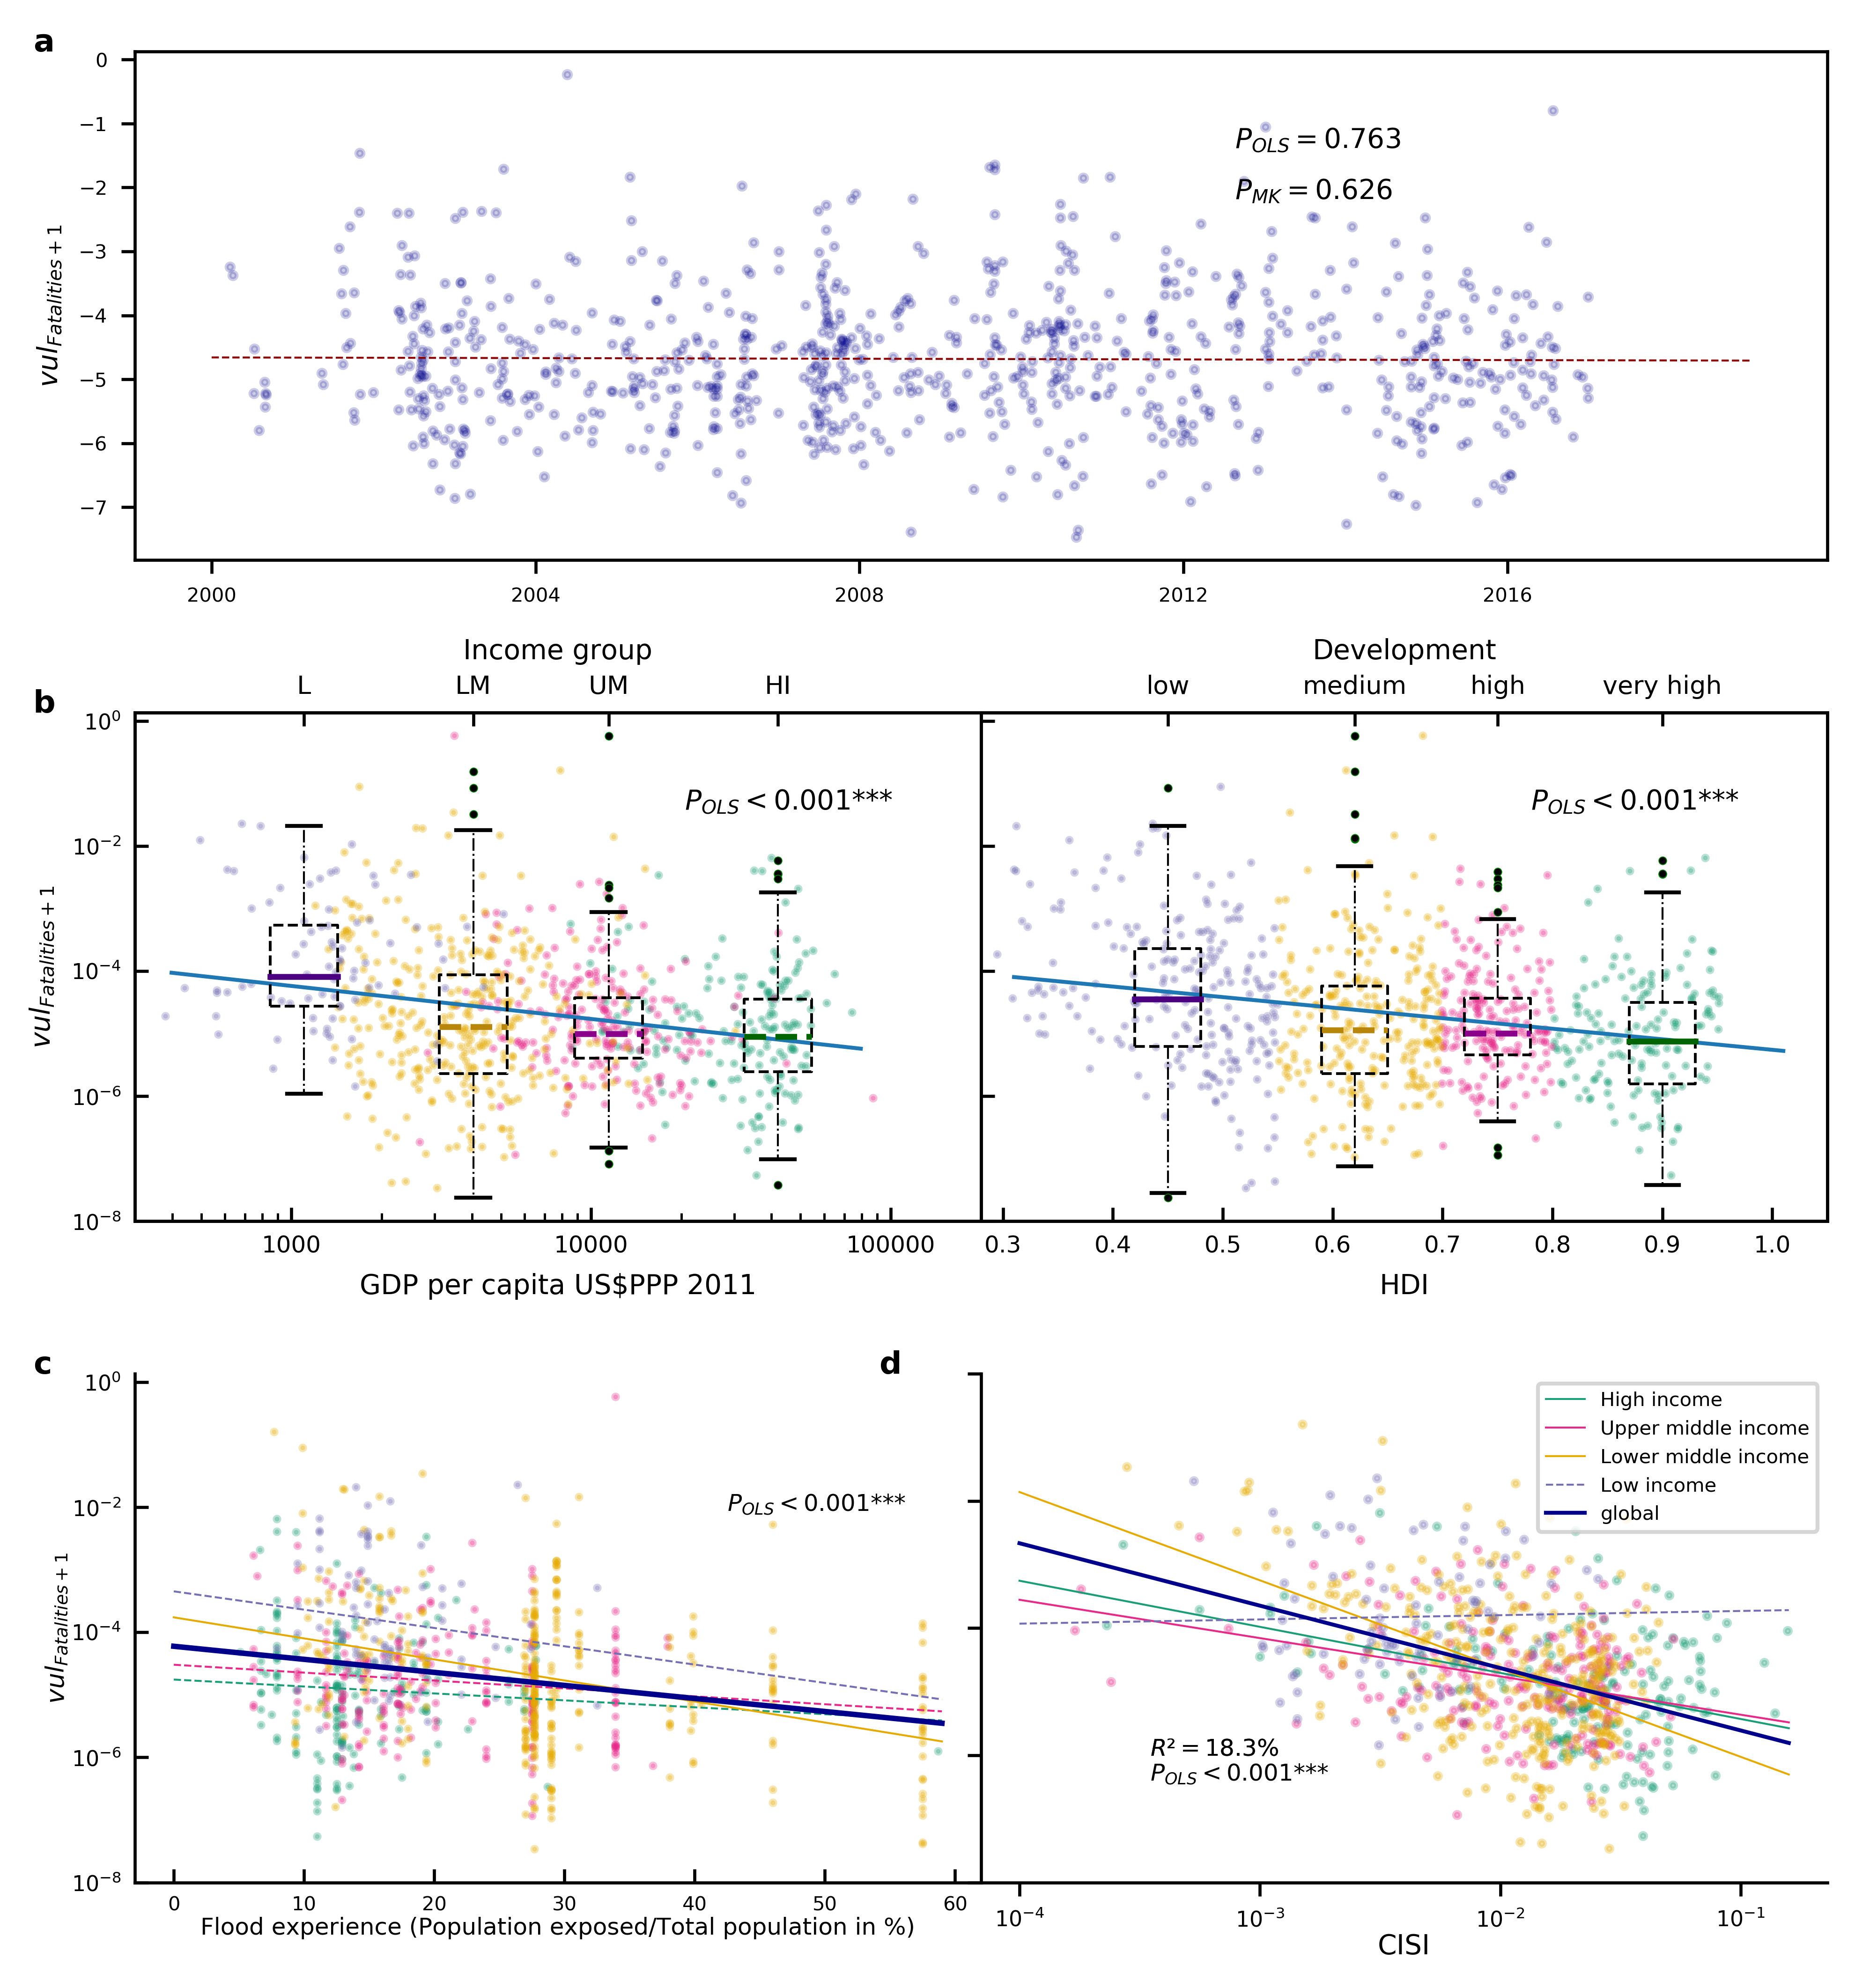

In [34]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)

plt.subplots_adjust(top=0.9, bottom= 0.13, left= 0.1, right=0.95, wspace=0., hspace=0.3)
fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(3, 2)
f3_ax1 = fig1.add_subplot(gs[0: 1, 0:2])
f3_ax1.text(-0.06,1 , 'a', transform=f3_ax1.transAxes, 
                size=8, weight='bold')

f3_ax1.scatter(natcat_matched['day_plot'], natcat_matched['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=natcat_matched['day_plot']
df1['const']=1

reg1 = sm.OLS(endog=natcat_matched['log_vul_fat_alt'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig= mk.original_test(natcat_matched['vul_fat_alt'], alpha=0.05)
p=sig.p
r=results.pvalues[1]

if r < 0.05:
    f3_ax1.plot(np.arange(2000,2020),y, c='darkred', linewidth=0.5, label=g)
else:
    f3_ax1.plot(np.arange(2000,2020),y, c='darkred', linestyle='dashed', linewidth=0.5, label=g)


if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
    
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'*', (0.65,0.81), xycoords='axes fraction',fontsize=7)        
else:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)

    
if p<0.001:
    f3_ax1.annotate('$P_{MK}<$'+str(0.001)+'***', (0.65,0.71), xycoords='axes fraction',fontsize=7)
    
elif p<0.01:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3))+'**', (0.65,0.71), xycoords='axes fraction',fontsize=7)
elif p<0.05:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3))+'*', (0.65,0.71), xycoords='axes fraction',fontsize=7)        
else:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3)), (0.65,0.71), xycoords='axes fraction',fontsize=7)

f3_ax1.set_xticks([2000,2004,2008,2012,2016])
f3_ax1.set_ylabel('$vul_{Fatalities+1}$', fontsize=7)
f3_ax1.tick_params(axis='both', which='major', labelsize=5)


i=0

for col in [0,1]:
    f3_ax1 = fig1.add_subplot(gs[1: 2, col:col+1])
    f3_ax2 = f3_ax1.twiny()
    if col==0:
        f3_ax1.text(-0.12,1 , 'b', transform=f3_ax1.transAxes, 
                size=8, weight='bold')


    for l,g in enumerate(inds[col]):

        f3_ax1.scatter(natcat_matched.loc[natcat_matched[col_names[col]]==g,var_names[col]],
                    natcat_matched.loc[natcat_matched[col_names[col]]==g,variables[i]],label=g, alpha=0.3,
                       s=1.4,c=cols[l])


    data_list=[]
    data_list1=[]
    for g in inds[col]:

        data_list.append(natcat_matched.loc[natcat_matched[col_names[col]]==g,variables[i]].dropna())


    if i<2:

        df1=pd.DataFrame()
        df1['day']=natcat_matched[reg_names[col]].replace([np.inf,-np.inf], [np.nan,np.nan])
        df1['const']=1

        reg1 = sm.OLS(endog=natcat_matched[variables[i]], exog=df1[['const','day']], 
            missing='drop')

        results = reg1.fit()
        y_ax=results.params[0]
        slope= results.params[1]

        #print(stats.kruskal(data_list[0],data_list[1]))


        r=results.pvalues['day']


        if col==0:
            h = np.arange(2.6,5.0,0.1)
        else:
            h = np.arange(0.31,1.05,0.05)
        y = slope*h + y_ax

        if col ==0:
            h= 10**h
        if i==1:
            if r < 0.05:
                f3_ax1.plot(h,y, linewidth=1.)
            else:
                f3_ax1.plot(h,y, linewidth=1., linestyle='--')
        else:
            if r < 0.05:
                f3_ax1.plot(h,y, linewidth=1.)
            else:
                f3_ax1.plot(h,y, linewidth=1., linestyle='--')

        if r<0.001:
            f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
        elif r<0.01:
            f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
        else:

            f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)
            
        labels1=[]
        for g in np.arange(len(inds[0])):
            sig=True

            for h in np.arange(len(inds[0])):
                if stats.kruskal(data_list[g],data_list[h]).pvalue > 0.1:
                    if g !=h:
                        sig=False
            labels1.append(sig)
        if i==1:
            labels2=[]
            for g in np.arange(len(inds[0])):
                sig=True

                for h in np.arange(len(inds[0])):
                    if stats.kruskal(data_list1[g],data_list1[h]).pvalue > 0.1:
                        if g !=h:
                            sig=False
                labels2.append(sig)
            
        for p, pos in enumerate(positions[col]):
            print(pos)
            if labels1[p]:
                
                boxprops = dict(linestyle='--', linewidth=0.7, color='k')
                medianprops = dict(linestyle='-', linewidth=1.5, color=median_colors[p])
            else:
                boxprops = dict(linestyle='--', linewidth=0.7, color='k')
                medianprops = dict(linestyle='--', linewidth=1.5, color=median_colors[p])
            
            if i==1:
                if labels2[p]:

                    f3_ax2.plot([pos-width[col]/3,pos+width[col]/3],
                                [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                                color='maroon', linewidth=0.8)
                else:
                    f3_ax2.plot([pos-width[col]/3,pos+width[col]/3],
                                [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                                color='maroon', linewidth=0.8)
                f3_ax2.set_xticklabels(['','','','','',''])

            f3_ax2.boxplot(data_list[p], positions=[pos], labels=[''] , widths=width[col],
                           boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
                           whiskerprops=whiskerprops)
                
        if i==2:
            f3_ax1.legend(fontsize=5.5, loc='upper right')
        f3_ax1.tick_params(axis='both', which='both', labelsize=6, direction='in')
        f3_ax2.tick_params(axis='both', which='both', labelsize=6, direction='in')
        #f3_ax3.tick_params(axis='both', which='major', labelsize=6, direction='in')

        
        f3_ax1.set_xlim(xlims[col])
        
        if i==0:

            f3_ax2.set_xticklabels(labels[col],fontsize=6.5)
            f3_ax2.set_xlabel(xlabel2[col],fontsize=7)
        #f3_ax1.set_ylabel(units[i], fontsize=6)
        if col==0:
            f3_ax2.set_xlim([0,5])
            f3_ax1.set_xscale('log')
            #f3_ax2.set_xscale('log')
            #f3_ax1.set_xticks([1000, 5000, 10000])
            #f3_ax1.set_xticks(xticks[col])
            f3_ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

            f3_ax1.set_ylabel(units[1], fontsize=7)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)
                
        else:
            f3_ax2.set_xlim(xlims[col])
            f3_ax1.set_yticklabels([])
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels([])
        f3_ax1.set_xlabel(xlabel1[col], fontsize=7)
        f3_ax2.set_xticks(positions[col])
        
        
f3_ax1 = fig1.add_subplot(gs[2: 3, 0:1])
f3_ax1.text(-0.12,1 , 'c', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
col=0
v=0
for l,g in enumerate(inds[0]):

    f3_ax1.scatter(natcat_matched.loc[natcat_matched[col_names[0]]==g,'modeled_fld_exp'],
                natcat_matched.loc[natcat_matched[col_names[0]]==g,variables[0]],
                                      alpha=0.3,s=1.4,c=cols[l])

for l,g in enumerate(inds[0]):

    df1=pd.DataFrame()
    df1['day']=natcat_matched.loc[natcat_matched[col_names[col]]==g,'modeled_fld_exp'].replace([np.inf,-np.inf], [np.nan,np.nan])
    df1['const']=1


    reg1 = sm.OLS(endog=natcat_matched.loc[natcat_matched[col_names[col]]==g,variables[v]],
                  exog=df1[['const','day']], missing='drop')
    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(0,60) + y_ax
    r=results.pvalues['day']

    if r < 0.05:
        f3_ax1.plot(np.arange(0,60),y, c=cols[l], linewidth=0.5, label=g)
    else:
        f3_ax1.plot(np.arange(0,60),y, c=cols[l], linestyle='dashed', linewidth=0.5, label=g)
df1=pd.DataFrame()
df1['day']=natcat_matched['modeled_fld_exp'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1

reg1 = sm.OLS(endog=natcat_matched[variables[v]], exog=df1[['const','day']], missing='drop')
                   
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(0,60) + y_ax
#print(stats.kruskal(data_list[0],data_list[1]))
r=results.pvalues['day']


if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.7,0.73), xycoords='axes fraction',fontsize=6)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'**', (0.7,0.73), xycoords='axes fraction',fontsize=6)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'*', (0.7,0.73), xycoords='axes fraction',fontsize=6)
else:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3), (0.7,0.73), xycoords='axes fraction',fontsize=6)


if r < 0.05:
    f3_ax1.plot(np.arange(0,60),y, c='darkblue', linewidth=1.4, label='global')
else:
    f3_ax1.plot(np.arange(0,60),y, c='darkblue', linestyle='dashed', linewidth=1.4, label='global')


f3_ax1.set_xlim([-3,62])
f3_ax1.set_ylabel(units[1],fontsize=6.5,labelpad=0.5)
f3_ax1.set_xlabel('Flood experience (Population exposed/Total population in %)',fontsize=6,labelpad=0.5)
f3_ax1.tick_params(axis='both', which='major', labelsize=5, direction='in')

f3_ax1.set_yticks([-8,-6,-4,-2,0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$',
                        '$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)



for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)




f3_ax1 = fig1.add_subplot(gs[2: 3, 1:2])
f3_ax1.text(-0.12,1 , 'd', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
    
for l,g in enumerate(income_groups):

    f3_ax1.scatter(natcat_matched.loc[natcat_matched['income_group']==g,'log_CISI_global_affected_mean'],
                natcat_matched.loc[natcat_matched['income_group']==g,variables[v]],
                   alpha=0.3, s=2.4, c=cols[l])                

for l,g in enumerate(income_groups):
    df1=pd.DataFrame()
    df1['day']=natcat_matched.loc[natcat_matched[col_names[0]]==g,'log_CISI_global_affected_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
    df1['const']=1

    reg1 = sm.OLS(endog=natcat_matched.loc[natcat_matched[col_names[0]]==g,variables[v]],
                  exog=df1[['const','day']], missing='drop')
    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(-4,-0.7,0.1)+ y_ax
    r = results.pvalues['day']

    if r < 0.05:
        f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c=cols[l], linewidth=0.5,label=g)
    else:
        f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c=cols[l], linestyle='dashed', linewidth=0.5,label=g)

df1=pd.DataFrame()
df1['day']=natcat_matched['log_CISI_global_affected_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1
corr= natcat_matched[[variables[v],'log_CISI_global_affected_mean']].corr('spearman').iloc[0,1]

reg1 = sm.OLS(endog=natcat_matched[variables[v]], exog=df1[['const','day']], missing='drop')

results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
R2=results.rsquared
print(r)

y = slope*np.arange(-4,-0.7,0.1) + y_ax
#print(stats.kruskal(data_list[0],data_list[1]))
r=results.pvalues['day']

if r < 0.05:
    f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c='darkblue', linewidth=1, label='global')
else:
    f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c='darkblue', linestyle='dashed', linewidth=0.5, label='global')
    
if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.2,0.2), xycoords='axes fraction',fontsize=6)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'**', (0.2,0.2), xycoords='axes fraction',fontsize=6)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'*', (0.2,0.2), xycoords='axes fraction',fontsize=6)
else:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3), (0.2,0.2), xycoords='axes fraction',fontsize=6)
f3_ax1.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.2,0.25), xycoords='axes fraction',fontsize=6)


f3_ax1.set_xlabel('CISI',fontsize=7,labelpad=0.5)
f3_ax1.tick_params(axis='both', which='major', labelsize=5)

f3_ax1.set_yticks([-8,-6,-4,-2,0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$',
                        '$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)
f3_ax1.set_xticks([-4,-3,-2,-1])
f3_ax1.set_xticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)


for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)


f3_ax1.set_yticks([-8,-6,-4,-2,0],['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'])

f3_ax1.set_xticks([-4,-3,-2,-1],['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])
f3_ax1.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.2,0.25), xycoords='axes fraction',fontsize=6)
#plt.xticks([2000,2004,2008,2012,2016])
#f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=7)
f3_ax1.set_xlabel('CISI', fontsize=7)
f3_ax1.legend(fontsize=5, loc='upper right')
f3_ax1.set_yticklabels([])
f3_ax1.tick_params(axis='both', which='major', labelsize=5.5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_natcat_fatalities+1.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

3.8
2.8
2
1
0.9
0.75
0.62
0.45


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.019446176901883192


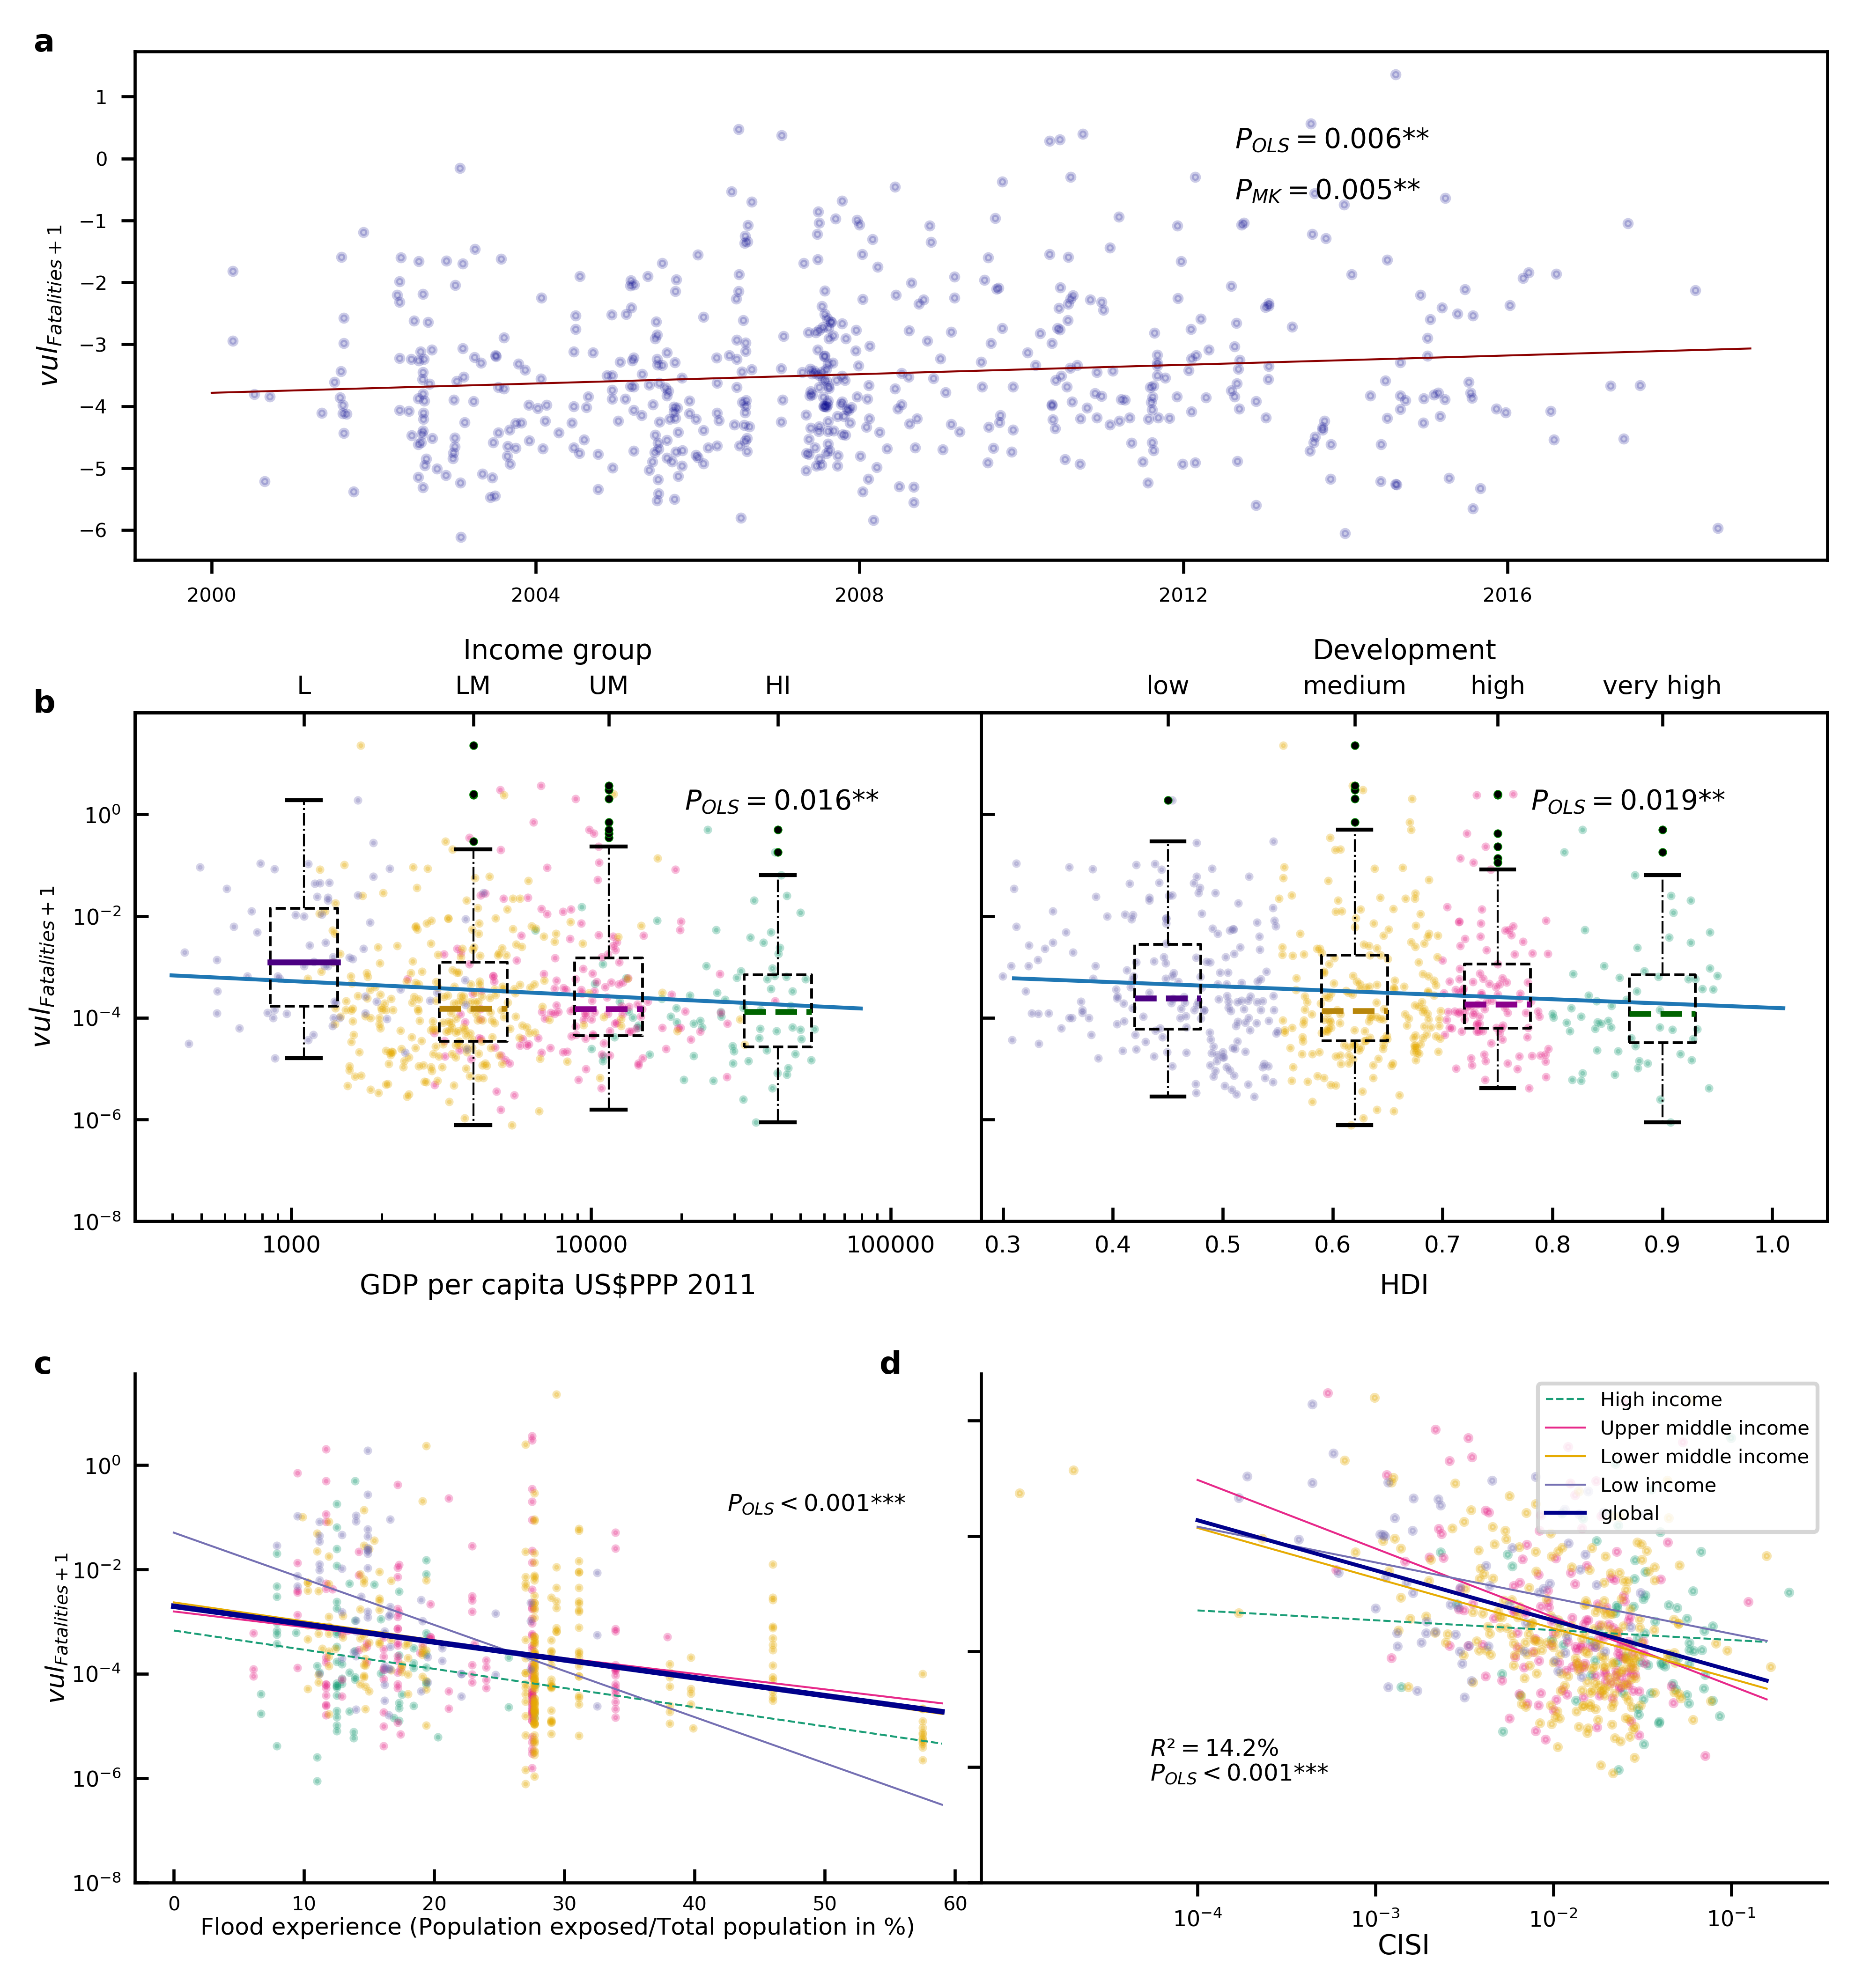

In [39]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)

plt.subplots_adjust(top=0.9, bottom= 0.13, left= 0.1, right=0.95, wspace=0., hspace=0.3)
fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(3, 2)
f3_ax1 = fig1.add_subplot(gs[0: 1, 0:2])
f3_ax1.text(-0.06,1 , 'a', transform=f3_ax1.transAxes, 
                size=8, weight='bold')

emdat_matched=emdat_matched.sort_values(by='day_plot')

f3_ax1.scatter(emdat_matched['day_plot'], emdat_matched['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=emdat_matched['day_plot']
df1['const']=1

reg1 = sm.OLS(endog=emdat_matched['log_vul_fat_alt'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig= mk.original_test(emdat_matched['vul_fat_alt'], alpha=0.05)
p=sig.p
r=results.pvalues[1]

if r < 0.05:
    f3_ax1.plot(np.arange(2000,2020),y, c='darkred', linewidth=0.5, label=g)
else:
    f3_ax1.plot(np.arange(2000,2020),y, c='darkred', linestyle='dashed', linewidth=0.5, label=g)


if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
    
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'*', (0.65,0.81), xycoords='axes fraction',fontsize=7)        
else:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)

    
if p<0.001:
    f3_ax1.annotate('$P_{MK}<$'+str(0.001)+'***', (0.65,0.71), xycoords='axes fraction',fontsize=7)
    
elif p<0.01:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3))+'**', (0.65,0.71), xycoords='axes fraction',fontsize=7)
elif p<0.05:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3))+'*', (0.65,0.71), xycoords='axes fraction',fontsize=7)        
else:
    f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3)), (0.65,0.71), xycoords='axes fraction',fontsize=7)


f3_ax1.set_xticks([2000,2004,2008,2012,2016])
f3_ax1.set_ylabel('$vul_{Fatalities+1}$', fontsize=7)
f3_ax1.tick_params(axis='both', which='major', labelsize=5)


i=0

for col in [0,1]:
    f3_ax1 = fig1.add_subplot(gs[1: 2, col:col+1])
    f3_ax2 = f3_ax1.twiny()
    if col==0:
        f3_ax1.text(-0.12,1 , 'b', transform=f3_ax1.transAxes, 
                size=8, weight='bold')


    for l,g in enumerate(inds[col]):

        f3_ax1.scatter(emdat_matched.loc[emdat_matched[col_names[col]]==g,var_names[col]],
                    emdat_matched.loc[emdat_matched[col_names[col]]==g,variables[i]],label=g, alpha=0.3,
                       s=1.4,c=cols[l])


    data_list=[]
    data_list1=[]
    for g in inds[col]:

        data_list.append(emdat_matched.loc[emdat_matched[col_names[col]]==g,variables[i]].dropna())


    if i<2:

        df1=pd.DataFrame()
        df1['day']=emdat_matched[reg_names[col]].replace([np.inf,-np.inf], [np.nan,np.nan])
        df1['const']=1

        reg1 = sm.OLS(endog=emdat_matched[variables[i]], exog=df1[['const','day']], 
            missing='drop')

        results = reg1.fit()
        y_ax=results.params[0]
        slope= results.params[1]

        #print(stats.kruskal(data_list[0],data_list[1]))


        r=results.pvalues['day']


        if col==0:
            h = np.arange(2.6,5.0,0.1)
        else:
            h = np.arange(0.31,1.05,0.05)

        y = slope*h + y_ax

        if col ==0:
            h= 10**h
        if i==1:
            if r < 0.05:
                f3_ax1.plot(h,y, linewidth=1.)
            else:
                f3_ax1.plot(h,y, linewidth=1., linestyle='--')
        else:
            if r < 0.05:
                f3_ax1.plot(h,y, linewidth=1.)
            else:
                f3_ax1.plot(h,y, linewidth=1., linestyle='--')


        if r<0.001:
            f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
        elif r<0.01:
            f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
        elif r<0.05:
            f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7) 
        else:

            f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)
            
        labels1=[]
        for g in np.arange(len(inds[0])):
            sig=True

            for h in np.arange(len(inds[0])):
                if stats.kruskal(data_list[g],data_list[h]).pvalue > 0.05:
                    if g !=h:
                        sig=False
            labels1.append(sig)
            
        for p, pos in enumerate(positions[col]):
            print(pos)
            if labels1[p]:
                
                boxprops = dict(linestyle='--', linewidth=0.7, color='k')
                medianprops = dict(linestyle='-', linewidth=1.5, color=median_colors[p])
            else:
                boxprops = dict(linestyle='--', linewidth=0.7, color='k')
                medianprops = dict(linestyle='--', linewidth=1.5, color=median_colors[p])

            f3_ax2.boxplot(data_list[p], positions=[pos], labels=[''] , widths=width[col],
                           boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
                           whiskerprops=whiskerprops)
                
        if i==2:
            f3_ax1.legend(fontsize=5.5, loc='upper right')
        f3_ax1.tick_params(axis='both', which='both', labelsize=6, direction='in')
        f3_ax2.tick_params(axis='both', which='both', labelsize=6, direction='in')
        #f3_ax3.tick_params(axis='both', which='major', labelsize=6, direction='in')

        
        f3_ax1.set_xlim(xlims[col])
        
        if i==0:

            f3_ax2.set_xticklabels(labels[col],fontsize=6.5)
            f3_ax2.set_xlabel(xlabel2[col],fontsize=7)
        #f3_ax1.set_ylabel(units[i], fontsize=6)
        if col==0:
            f3_ax2.set_xlim([0,5])
            f3_ax1.set_xscale('log')
            #f3_ax2.set_xscale('log')
            #f3_ax1.set_xticks([1000, 5000, 10000])
            #f3_ax1.set_xticks(xticks[col])
            f3_ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

            f3_ax1.set_ylabel(units[1], fontsize=7)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)
                
        else:
            f3_ax2.set_xlim(xlims[col])
            f3_ax1.set_yticklabels([])
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels([])
        f3_ax1.set_xlabel(xlabel1[col], fontsize=7)
        f3_ax2.set_xticks(positions[col])
        
    f3_ax1.set_ylim([-8,2])
    f3_ax2.set_ylim([-8,2])
        
f3_ax1 = fig1.add_subplot(gs[2: 3, 0:1])
f3_ax1.text(-0.12,1 , 'c', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
col=0
v=0
for l,g in enumerate(inds[0]):

    f3_ax1.scatter(emdat_matched.loc[emdat_matched[col_names[0]]==g,'modeled_fld_exp'],
                emdat_matched.loc[emdat_matched[col_names[0]]==g,variables[0]],
                                      alpha=0.3,s=1.4,c=cols[l])

for l,g in enumerate(inds[0]):

    df1=pd.DataFrame()
    df1['day']=emdat_matched.loc[emdat_matched[col_names[col]]==g,'modeled_fld_exp'].replace([np.inf,-np.inf], [np.nan,np.nan])
    df1['const']=1


    reg1 = sm.OLS(endog=emdat_matched.loc[emdat_matched[col_names[col]]==g,variables[v]],
                  exog=df1[['const','day']], missing='drop')
    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(0,60) + y_ax
    r=results.pvalues['day']

    if r < 0.05:
        f3_ax1.plot(np.arange(0,60),y, c=cols[l], linewidth=0.5, label=g)
    else:
        f3_ax1.plot(np.arange(0,60),y, c=cols[l], linestyle='dashed', linewidth=0.5, label=g)
df1=pd.DataFrame()
df1['day']=emdat_matched['modeled_fld_exp'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1

reg1 = sm.OLS(endog=emdat_matched[variables[v]], exog=df1[['const','day']], missing='drop')
                   
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(0,60) + y_ax
#print(stats.kruskal(data_list[0],data_list[1]))
r=results.pvalues['day']


if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.7,0.73), xycoords='axes fraction',fontsize=6)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'**', (0.7,0.73), xycoords='axes fraction',fontsize=6)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'*', (0.7,0.73), xycoords='axes fraction',fontsize=6)
else:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3), (0.7,0.73), xycoords='axes fraction',fontsize=6)


if r < 0.05:
    f3_ax1.plot(np.arange(0,60),y, c='darkblue', linewidth=1.4, label='global')
else:
    f3_ax1.plot(np.arange(0,60),y, c='darkblue', linestyle='dashed', linewidth=1.4, label='global')


f3_ax1.set_xlim([-3,62])
f3_ax1.set_ylabel(units[1],fontsize=6.5,labelpad=0.5)
f3_ax1.set_xlabel('Flood experience (Population exposed/Total population in %)',fontsize=6,labelpad=0.5)
f3_ax1.tick_params(axis='both', which='major', labelsize=5, direction='in')

f3_ax1.set_yticks([-8,-6,-4,-2,0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$',
                        '$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)



for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)




f3_ax1 = fig1.add_subplot(gs[2: 3, 1:2])
f3_ax1.text(-0.12,1 , 'd', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
    
for l,g in enumerate(income_groups):

    f3_ax1.scatter(emdat_matched.loc[emdat_matched['income_group']==g,'log_CISI_global_affected_mean'],
                emdat_matched.loc[emdat_matched['income_group']==g,variables[v]],
                   alpha=0.3, s=2.4, c=cols[l])                

for l,g in enumerate(income_groups):
    df1=pd.DataFrame()
    df1['day']=emdat_matched.loc[emdat_matched[col_names[0]]==g,'log_CISI_global_affected_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
    df1['const']=1

    reg1 = sm.OLS(endog=emdat_matched.loc[emdat_matched[col_names[0]]==g,variables[v]],
                  exog=df1[['const','day']], missing='drop')
    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(-4,-0.7,0.1)+ y_ax
    r = results.pvalues['day']

    if r < 0.05:
        f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c=cols[l], linewidth=0.5,label=g)
    else:
        f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c=cols[l], linestyle='dashed', linewidth=0.5,label=g)

df1=pd.DataFrame()
df1['day']=emdat_matched['log_CISI_global_affected_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1
corr= emdat_matched[[variables[v],'log_CISI_global_affected_mean']].corr('spearman').iloc[0,1]

reg1 = sm.OLS(endog=emdat_matched[variables[v]], exog=df1[['const','day']], missing='drop')

results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
R2=results.rsquared
print(r)

y = slope*np.arange(-4,-0.7,0.1) + y_ax
#print(stats.kruskal(data_list[0],data_list[1]))
r=results.pvalues['day']
if r < 0.05:
    f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c='darkblue', linewidth=1, label='global')
else:
    f3_ax1.plot(np.arange(-4,-0.7,0.1),y, c='darkblue', linestyle='dashed', linewidth=0.5, label='global')
    
if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.2,0.2), xycoords='axes fraction',fontsize=6)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'**', (0.2,0.2), xycoords='axes fraction',fontsize=6)
elif r<0.05:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3)+'*', (0.2,0.2), xycoords='axes fraction',fontsize=6)
else:
    f3_ax1.annotate('$P_{OLS}=$'+"%.3f" % round(r, 3), (0.2,0.2), xycoords='axes fraction',fontsize=6)
f3_ax1.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.2,0.25), xycoords='axes fraction',fontsize=6)

f3_ax1.set_xlabel('CISI',fontsize=7,labelpad=0.5)
f3_ax1.tick_params(axis='both', which='major', labelsize=5)

f3_ax1.set_yticks([-8,-6,-4,-2,0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$',
                        '$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)
f3_ax1.set_xticks([-4,-3,-2,-1])
f3_ax1.set_xticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)


for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)


f3_ax1.set_yticks([-8,-6,-4,-2,0],['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'])

f3_ax1.set_xticks([-4,-3,-2,-1],['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])

#plt.xticks([2000,2004,2008,2012,2016])
#f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=7)

f3_ax1.set_xlabel('CISI', fontsize=7)
f3_ax1.legend(fontsize=5, loc='upper right')
f3_ax1.set_yticklabels([])
f3_ax1.tick_params(axis='both', which='major', labelsize=5.5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_emdat_fatalities+1.png')